# Loan Application Status Prediction

# Problem Statement:

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

# Importing required Library

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
df_n=pd.read_csv('loan_prediction.csv')

In [3]:
df_n

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df_n.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Exploratory Data Analysis

In [5]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df_n['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [7]:
df_n['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [8]:
df_n['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

Label Encoder

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le=LabelEncoder()
df_n['Loan_Status']=le.fit_transform(df_n['Loan_Status'])

In [11]:
le.inverse_transform([1,0])

array(['Y', 'N'], dtype=object)

In [12]:
df_n['Self_Employed']=le.fit_transform(df_n['Self_Employed'])

In [13]:
le.inverse_transform([1,0])

array(['Yes', 'No'], dtype=object)

# Visualization

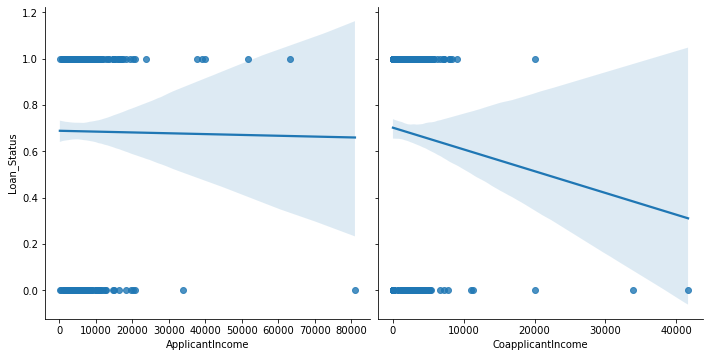

In [14]:
sns.pairplot(df_n,x_vars=['ApplicantIncome','CoapplicantIncome'],y_vars='Loan_Status',size=5,aspect=1,
             kind='reg')

In [15]:
import matplotlib.pyplot as plt

(0.0, 1143.8694613640057)

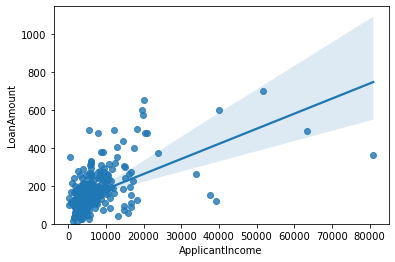

In [16]:
sns.regplot(x='ApplicantIncome',y='LoanAmount',data=df_n)
plt.ylim(0,)

<AxesSubplot:xlabel='Dependents', ylabel='LoanAmount'>

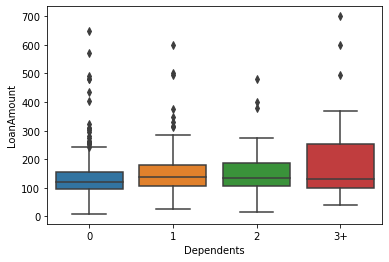

In [17]:
sns.boxplot(x='Dependents',y='LoanAmount',data=df_n)

<AxesSubplot:xlabel='Self_Employed', ylabel='LoanAmount'>

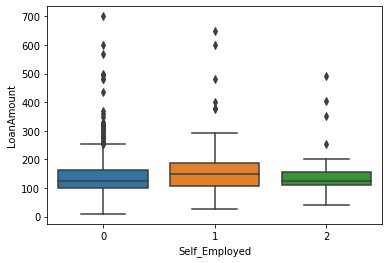

In [18]:
sns.boxplot(x='Self_Employed',y='LoanAmount',data=df_n)

<AxesSubplot:xlabel='Credit_History', ylabel='LoanAmount'>

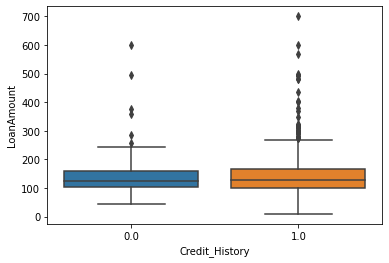

In [19]:
sns.boxplot(x='Credit_History',y='LoanAmount',data=df_n)

In [20]:
df=df_n.drop(['Gender','Married','Education','Property_Area'],axis=1)

In [21]:
df

,Loan_ID,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,LP001002,0,0,5849,0.0,NaN,360.0,1.0,1
1,LP001003,1,0,4583,1508.0,128.0,360.0,1.0,0
2,LP001005,0,1,3000,0.0,66.0,360.0,1.0,1
3,LP001006,0,0,2583,2358.0,120.0,360.0,1.0,1
4,LP001008,0,0,6000,0.0,141.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,2900,0.0,71.0,360.0,1.0,1
610,LP002979,3+,0,4106,0.0,40.0,180.0,1.0,1
611,LP002983,1,0,8072,240.0,253.0,360.0,1.0,1
612,LP002984,2,0,7583,0.0,187.0,360.0,1.0,1


In [22]:
pd.set_option('display.max_rows',None)

In [23]:
df

,Loan_ID,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,LP001002,0,0,5849,0.000000,NaN,360.0,1.0,1
1,LP001003,1,0,4583,1508.000000,128.0,360.0,1.0,0
2,LP001005,0,1,3000,0.000000,66.0,360.0,1.0,1
3,LP001006,0,0,2583,2358.000000,120.0,360.0,1.0,1
4,LP001008,0,0,6000,0.000000,141.0,360.0,1.0,1
5,LP001011,2,1,5417,4196.000000,267.0,360.0,1.0,1
6,LP001013,0,0,2333,1516.000000,95.0,360.0,1.0,1
7,LP001014,3+,0,3036,2504.000000,158.0,360.0,0.0,0
8,LP001018,2,0,4006,1526.000000,168.0,360.0,1.0,1
9,LP001020,1,0,12841,10968.000000,349.0,360.0,1.0,0


In [24]:
df.shape

(614, 9)

In [25]:
df.sample()

,Loan_ID,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
500,LP002603,0,0,645,3683.0,113.0,480.0,1.0,1


In [26]:
df.head()

,Loan_ID,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,LP001002,0,0,5849,0.0,NaN,360.0,1.0,1
1,LP001003,1,0,4583,1508.0,128.0,360.0,1.0,0
2,LP001005,0,1,3000,0.0,66.0,360.0,1.0,1
3,LP001006,0,0,2583,2358.0,120.0,360.0,1.0,1
4,LP001008,0,0,6000,0.0,141.0,360.0,1.0,1


In [27]:
df.tail()

,Loan_ID,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
609,LP002978,0,0,2900,0.0,71.0,360.0,1.0,1
610,LP002979,3+,0,4106,0.0,40.0,180.0,1.0,1
611,LP002983,1,0,8072,240.0,253.0,360.0,1.0,1
612,LP002984,2,0,7583,0.0,187.0,360.0,1.0,1
613,LP002990,0,1,4583,0.0,133.0,360.0,0.0,0


In [28]:
df.describe(include='all')

,Loan_ID,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614,599,614.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
unique,614,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,LP001002,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.237785,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296
std,NaN,NaN,0.534737,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973
min,NaN,NaN,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,NaN,NaN,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,NaN,NaN,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,NaN,NaN,0.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000


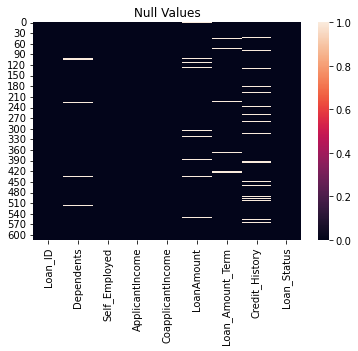

In [29]:
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

In [30]:
#Checking the null values in dataset
df.isnull().sum().sum()

101

In [31]:
df.dropna(inplace=True)

In [32]:
df.isnull().sum().sum()

0

Therfore there is no mmissing values in the dataset

# Checking the Correlation

In [33]:
df.corr()

,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
Self_Employed,1.000000,0.108699,-0.019667,0.064026,-0.037633,0.042560,0.041289
ApplicantIncome,0.108699,1.000000,-0.124310,0.570441,-0.063364,-0.028704,-0.008263
CoapplicantIncome,-0.019667,-0.124310,1.000000,0.157472,0.002263,-0.011741,-0.045302
LoanAmount,0.064026,0.570441,0.157472,1.000000,0.022322,-0.021110,-0.038287
Loan_Amount_Term,-0.037633,-0.063364,0.002263,0.022322,1.000000,0.023540,-0.020157
Credit_History,0.042560,-0.028704,-0.011741,-0.021110,0.023540,1.000000,0.534817
Loan_Status,0.041289,-0.008263,-0.045302,-0.038287,-0.020157,0.534817,1.000000


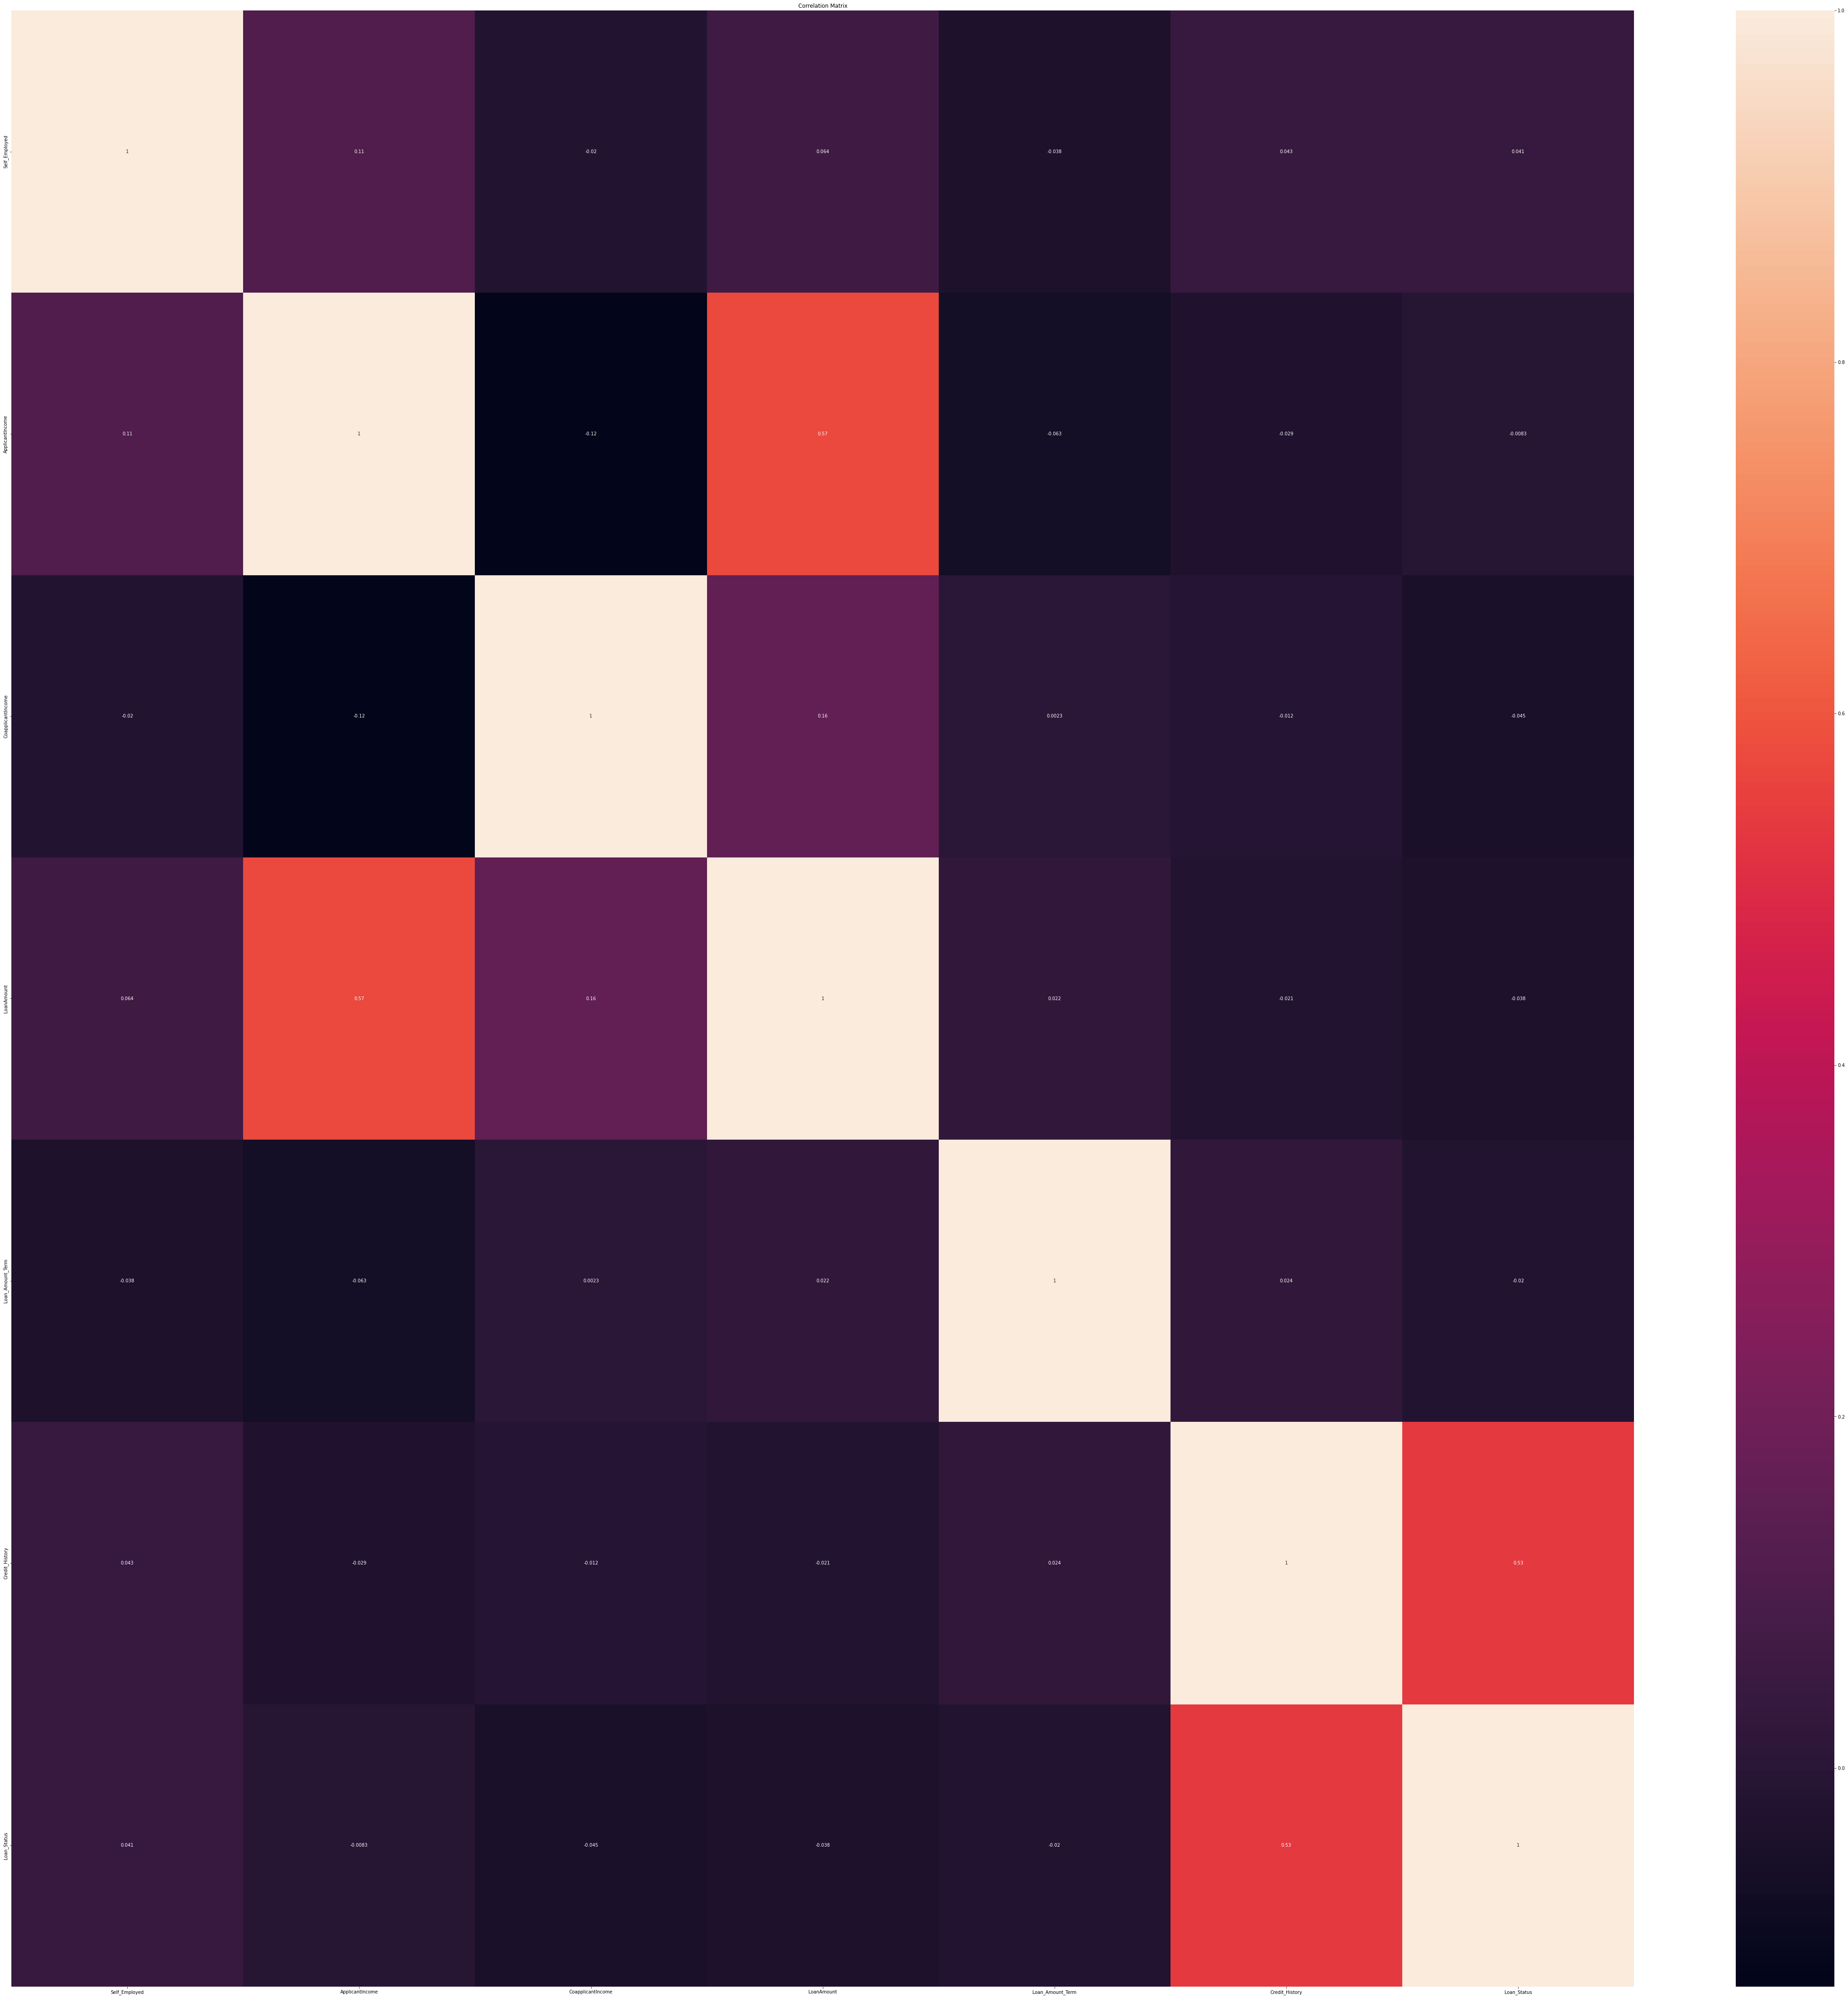

In [34]:
corr_mat=df.corr()
#size of the canvas
plt.figure(figsize=[80,80])
#plot the correlation matrix
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.savefig('Loan status correlation_matrix.jpg')
plt.show()

In [35]:
corr_matrix=df.corr()
corr_matrix

,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
Self_Employed,1.000000,0.108699,-0.019667,0.064026,-0.037633,0.042560,0.041289
ApplicantIncome,0.108699,1.000000,-0.124310,0.570441,-0.063364,-0.028704,-0.008263
CoapplicantIncome,-0.019667,-0.124310,1.000000,0.157472,0.002263,-0.011741,-0.045302
LoanAmount,0.064026,0.570441,0.157472,1.000000,0.022322,-0.021110,-0.038287
Loan_Amount_Term,-0.037633,-0.063364,0.002263,0.022322,1.000000,0.023540,-0.020157
Credit_History,0.042560,-0.028704,-0.011741,-0.021110,0.023540,1.000000,0.534817
Loan_Status,0.041289,-0.008263,-0.045302,-0.038287,-0.020157,0.534817,1.000000


In [36]:
type(corr_matrix)

pandas.core.frame.DataFrame

In [37]:
corr_matrix=df.corr()

In [38]:
corr_matrix['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.534817
Self_Employed        0.041289
ApplicantIncome     -0.008263
Loan_Amount_Term    -0.020157
LoanAmount          -0.038287
CoapplicantIncome   -0.045302
Name: Loan_Status, dtype: float64

Strong positive correlation is between Credit history and loan_status and weak positive correlation is
between self employed and loan status. Strong negative correlation is between applicant income and 
loan status and very weak correlation is between coapplicant income and loan status

# Let's check the data distribution among the columns

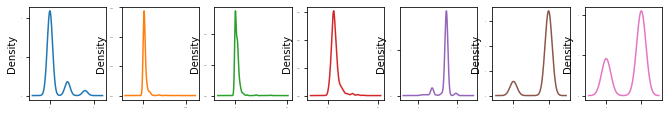

In [39]:
df.plot(kind='density',subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=1,figsize=(18,12))
plt.show()

We can see skewness in most of our columns will remove skewness in further steps

In [40]:
x=df.drop(['Loan_Status','Loan_ID','Dependents'],axis=1)
y=df['Loan_Status']

In [41]:
x

,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
1,0,4583,1508.000000,128.0,360.0,1.0
2,1,3000,0.000000,66.0,360.0,1.0
3,0,2583,2358.000000,120.0,360.0,1.0
4,0,6000,0.000000,141.0,360.0,1.0
5,1,5417,4196.000000,267.0,360.0,1.0
6,0,2333,1516.000000,95.0,360.0,1.0
7,0,3036,2504.000000,158.0,360.0,0.0
8,0,4006,1526.000000,168.0,360.0,1.0
9,0,12841,10968.000000,349.0,360.0,1.0
10,0,3200,700.000000,70.0,360.0,1.0


In [42]:
y

1      0
2      1
3      1
4      1
5      1
6      1
7      0
8      1
9      0
10     1
11     1
12     1
13     0
14     1
15     1
17     0
18     0
20     0
21     1
22     0
23     0
25     1
26     1
27     1
28     0
29     1
31     0
32     0
33     1
34     0
37     1
38     1
39     1
40     0
41     1
43     1
46     1
47     1
48     0
49     1
50     1
51     1
52     0
53     0
54     0
55     1
56     1
57     0
58     1
59     1
60     1
61     1
62     0
64     0
65     0
66     0
67     1
68     1
69     0
70     1
71     1
72     1
74     1
75     0
76     0
77     0
78     0
80     1
82     0
84     1
85     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     1
96     1
97     1
98     1
99     1
100    1
101    1
105    1
106    1
107    0
108    0
109    1
110    1
111    1
114    1
115    1
116    1
118    0
119    1
121    1
122    1
123    1
124    1
126    1
128    0
131    1
132    1
133    1
134    1
135    0
136    0
137    1
138    0
1

In [43]:
# Checking the skewness
x.skew().sort_values(ascending=False)

ApplicantIncome      6.399195
CoapplicantIncome    5.960842
LoanAmount           2.584748
Self_Employed        2.231620
Credit_History      -2.043956
Loan_Amount_Term    -2.338244
dtype: float64

In [44]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)

In [45]:
# Checking skewness
pd.DataFrame(x_new).skew().sort_values(ascending=False)

0    1.654806
4    0.419303
3    0.031458
1   -0.102007
2   -0.134109
5   -2.043956
dtype: float64

In [46]:
type(x_new)

numpy.ndarray

In [47]:
x=pd.DataFrame(x_new,columns=x.columns)

In [48]:
x

,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,-0.471399,0.149549,0.766071,-0.027590,0.181983,0.408709
1,2.114720,-0.512407,-1.094318,-1.286838,0.181983,0.408709
2,-0.471399,-0.753339,0.905243,-0.153819,0.181983,0.408709
3,-0.471399,0.555317,-1.094318,0.163032,0.181983,0.408709
4,2.114720,0.402715,1.089736,1.464699,0.181983,0.408709
5,-0.471399,-0.919394,0.767698,-0.604358,0.181983,0.408709
6,-0.471399,-0.493366,0.924206,0.389568,0.181983,-2.446730
7,-0.471399,-0.057470,0.769721,0.512686,0.181983,0.408709
8,-0.471399,1.641075,1.410445,2.033463,0.181983,0.408709
9,-0.471399,-0.409673,0.534943,-1.178232,0.181983,0.408709


In [49]:
x.skew().sort_values(ascending=False)

Self_Employed        1.654806
Loan_Amount_Term     0.419303
LoanAmount           0.031458
ApplicantIncome     -0.102007
CoapplicantIncome   -0.134109
Credit_History      -2.043956
dtype: float64

In [50]:
sk=x.skew()
sk

Self_Employed        1.654806
ApplicantIncome     -0.102007
CoapplicantIncome   -0.134109
LoanAmount           0.031458
Loan_Amount_Term     0.419303
Credit_History      -2.043956
dtype: float64

In [51]:
sk[np.abs(sk)>0.5].all()

True

In [52]:
sk[np.abs(sk)>0.5]

Self_Employed     1.654806
Credit_History   -2.043956
dtype: float64

In [53]:
x.skew()[np.abs(x.skew())<0.25].all()

True

Skewness has been removed, now we can proceed with further steps

# Checking the outliers

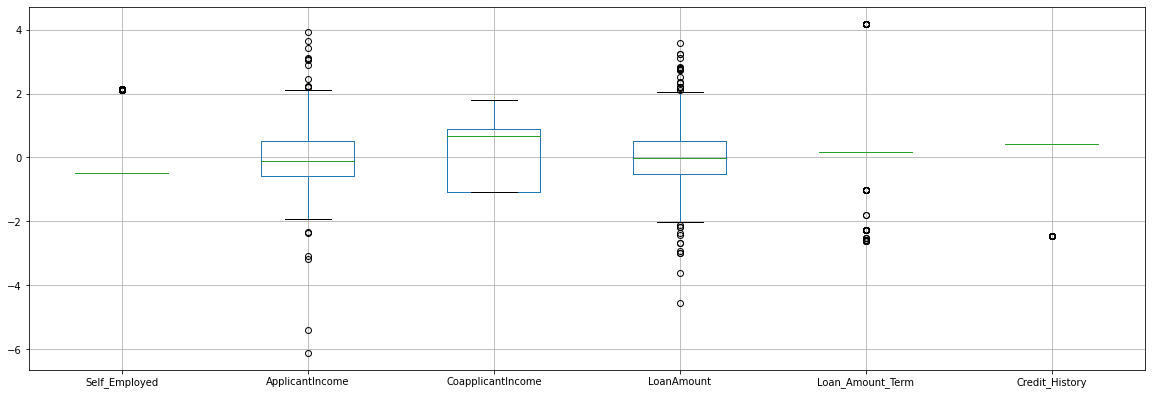

In [54]:
# Plotting boxplots 
x.iloc[:,0:7].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [55]:
from scipy.stats import zscore
(np.abs(zscore(x))<3).all()

Self_Employed         True
ApplicantIncome      False
CoapplicantIncome     True
LoanAmount           False
Loan_Amount_Term     False
Credit_History        True
dtype: bool

Removing outliers by Quantile technique

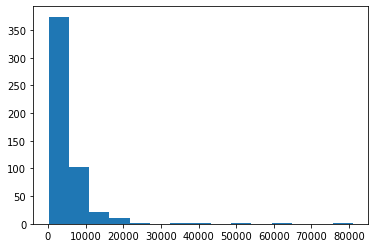

In [56]:
plt.hist(df['ApplicantIncome'],bins=15)
plt.show()

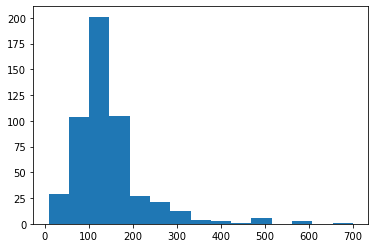

In [57]:
plt.hist(df['LoanAmount'],bins=15)
plt.show()

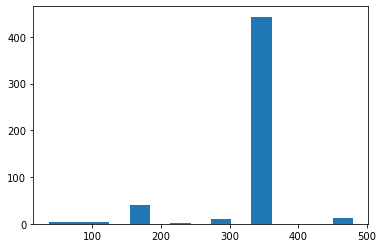

In [58]:
plt.hist(df['Loan_Amount_Term'],bins=15)
plt.show()

1. Applicant Income

In [59]:
# Finding the IQR
percentile25=df['ApplicantIncome'].quantile(0.25)
percentile75=df['ApplicantIncome'].quantile(0.75)

In [60]:
percentile75

5821.0

In [61]:
iqr=percentile75-percentile25

In [62]:
iqr

2926.0

In [63]:
upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

In [64]:
print('upper limit',upper_limit)
print('lower limit',lower_limit)

upper limit 10210.0
lower limit -1494.0


In [65]:
# Finding Outliers
df[df['ApplicantIncome']>upper_limit]

,Loan_ID,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
9,LP001020,1,0,12841,10968.0,349.0,360.0,1.0,0
34,LP001100,3+,0,12500,3000.0,320.0,360.0,1.0,0
54,LP001186,1,1,11500,0.0,286.0,360.0,0.0,0
67,LP001233,1,0,10750,0.0,312.0,360.0,1.0,1
106,LP001369,2,0,11417,1126.0,225.0,360.0,1.0,1
115,LP001401,1,0,14583,0.0,185.0,180.0,1.0,1
119,LP001422,0,0,10408,0.0,259.0,360.0,1.0,1
126,LP001448,3+,0,23803,0.0,370.0,360.0,1.0,1
128,LP001451,1,1,10513,3850.0,160.0,180.0,0.0,0
138,LP001492,0,0,14999,0.0,242.0,360.0,0.0,0


In [66]:
df[df['ApplicantIncome']<lower_limit]

,Loan_ID,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status


In [67]:
# Trimming
new_df=df[df['ApplicantIncome']<upper_limit]

In [68]:
new_df.shape

(472, 9)

In [69]:
# Capping
new_df_cap=df.copy()

new_df_cap['ApplicantIncome']=np.where(
    new_df_cap['ApplicantIncome']>upper_limit,
    upper_limit,
    np.where(
       new_df_cap['ApplicantIncome']<lower_limit,
       lower_limit,
       new_df_cap['ApplicantIncome']
    )
)

In [70]:
new_df_cap.shape

(517, 9)

2. Loan Amount 

In [71]:
# Finding the Iqr
per25=df['LoanAmount'].quantile(0.25)
per75=df['LoanAmount'].quantile(0.75)

In [72]:
per25

100.0

In [73]:
per75

168.0

In [74]:
iqr=per75-per25

In [75]:
iqr

68.0

In [76]:
upper_limit=per75+1.5*iqr
lower_limit=per25-1.5*iqr

In [77]:
print('Upper Limit',upper_limit)
print('Lower Limit',lower_limit)

Upper Limit 270.0
Lower Limit -2.0


In [78]:
# Finding Outliers
df[df['LoanAmount']>upper_limit]

,Loan_ID,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
9,LP001020,1,0,12841,10968.0,349.0,360.0,1.0,0
21,LP001046,1,0,5955,5625.0,315.0,360.0,1.0,1
34,LP001100,3+,0,12500,3000.0,320.0,360.0,1.0,0
54,LP001186,1,1,11500,0.0,286.0,360.0,0.0,0
67,LP001233,1,0,10750,0.0,312.0,360.0,1.0,1
126,LP001448,3+,0,23803,0.0,370.0,360.0,1.0,1
135,LP001488,3+,0,4000,7750.0,290.0,360.0,1.0,0
155,LP001536,3+,0,39999,0.0,600.0,180.0,0.0,1
161,LP001562,0,0,7933,0.0,275.0,360.0,1.0,0
171,LP001585,3+,0,51763,0.0,700.0,300.0,1.0,1


In [79]:
df[df['LoanAmount']<lower_limit]

,Loan_ID,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status


In [80]:
# Trimming
new_df=df[df['LoanAmount']<upper_limit]

In [81]:
new_df.shape

(482, 9)

In [82]:
# Capping
new_df_cap=df.copy()
new_df_cap['LoanAmount']=np.where(
    new_df_cap['LoanAmount']>upper_limit,
    upper_limit,
    np.where(
       new_df_cap['LoanAmount']<lower_limit,
       lower_limit,
       new_df_cap['LoanAmount']
    )
)

In [83]:
new_df_cap.shape

(517, 9)

In [84]:
df.shape

(517, 9)

In [85]:
x=new_df_cap.drop(['Loan_ID','Dependents','Self_Employed','Credit_History','Loan_Status'],axis=1)
y=new_df_cap['Loan_Status']

In [86]:
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
1,4583,1508.000000,128.0,360.0
2,3000,0.000000,66.0,360.0
3,2583,2358.000000,120.0,360.0
4,6000,0.000000,141.0,360.0
5,5417,4196.000000,267.0,360.0
6,2333,1516.000000,95.0,360.0
7,3036,2504.000000,158.0,360.0
8,4006,1526.000000,168.0,360.0
9,12841,10968.000000,270.0,360.0
10,3200,700.000000,70.0,360.0


In [87]:
y

1      0
2      1
3      1
4      1
5      1
6      1
7      0
8      1
9      0
10     1
11     1
12     1
13     0
14     1
15     1
17     0
18     0
20     0
21     1
22     0
23     0
25     1
26     1
27     1
28     0
29     1
31     0
32     0
33     1
34     0
37     1
38     1
39     1
40     0
41     1
43     1
46     1
47     1
48     0
49     1
50     1
51     1
52     0
53     0
54     0
55     1
56     1
57     0
58     1
59     1
60     1
61     1
62     0
64     0
65     0
66     0
67     1
68     1
69     0
70     1
71     1
72     1
74     1
75     0
76     0
77     0
78     0
80     1
82     0
84     1
85     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     1
96     1
97     1
98     1
99     1
100    1
101    1
105    1
106    1
107    0
108    0
109    1
110    1
111    1
114    1
115    1
116    1
118    0
119    1
121    1
122    1
123    1
124    1
126    1
128    0
131    1
132    1
133    1
134    1
135    0
136    0
137    1
138    0
1

In [88]:
x.shape

(517, 4)

In [89]:
y.shape

(517,)

In [90]:
from scipy.stats import zscore
(np.abs(zscore(x))<3).all()

ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term     False
dtype: bool

# Training Process Began

In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

Best Random State

In [92]:
maxaccu=0
maxrs=0
for i in range(1,520):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    print('accuracy',acc,'random_state',i)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
        print('accuracy',maxaccu,'random_state',i)

accuracy 0.6826923076923077 random_state 1
accuracy 0.6826923076923077 random_state 1
accuracy 0.6634615384615384 random_state 2
accuracy 0.6442307692307693 random_state 3
accuracy 0.5769230769230769 random_state 4
accuracy 0.7115384615384616 random_state 5
accuracy 0.7115384615384616 random_state 5
accuracy 0.6346153846153846 random_state 6
accuracy 0.7019230769230769 random_state 7
accuracy 0.6730769230769231 random_state 8
accuracy 0.6826923076923077 random_state 9
accuracy 0.6923076923076923 random_state 10
accuracy 0.6346153846153846 random_state 11
accuracy 0.7211538461538461 random_state 12
accuracy 0.7211538461538461 random_state 12
accuracy 0.6442307692307693 random_state 13
accuracy 0.6730769230769231 random_state 14
accuracy 0.625 random_state 15
accuracy 0.7211538461538461 random_state 16
accuracy 0.6346153846153846 random_state 17
accuracy 0.7115384615384616 random_state 18
accuracy 0.6538461538461539 random_state 19
accuracy 0.6730769230769231 random_state 20
accuracy 0.6

accuracy 0.75 random_state 184
accuracy 0.6538461538461539 random_state 185
accuracy 0.7307692307692307 random_state 186
accuracy 0.6538461538461539 random_state 187
accuracy 0.6923076923076923 random_state 188
accuracy 0.6538461538461539 random_state 189
accuracy 0.6923076923076923 random_state 190
accuracy 0.6538461538461539 random_state 191
accuracy 0.6923076923076923 random_state 192
accuracy 0.6730769230769231 random_state 193
accuracy 0.6634615384615384 random_state 194
accuracy 0.6730769230769231 random_state 195
accuracy 0.6538461538461539 random_state 196
accuracy 0.6826923076923077 random_state 197
accuracy 0.5961538461538461 random_state 198
accuracy 0.7211538461538461 random_state 199
accuracy 0.6923076923076923 random_state 200
accuracy 0.75 random_state 201
accuracy 0.6538461538461539 random_state 202
accuracy 0.6442307692307693 random_state 203
accuracy 0.7115384615384616 random_state 204
accuracy 0.6826923076923077 random_state 205
accuracy 0.6442307692307693 random_sta

accuracy 0.7019230769230769 random_state 375
accuracy 0.6923076923076923 random_state 376
accuracy 0.6923076923076923 random_state 377
accuracy 0.6826923076923077 random_state 378
accuracy 0.7115384615384616 random_state 379
accuracy 0.6730769230769231 random_state 380
accuracy 0.6442307692307693 random_state 381
accuracy 0.6730769230769231 random_state 382
accuracy 0.7307692307692307 random_state 383
accuracy 0.6538461538461539 random_state 384
accuracy 0.7211538461538461 random_state 385
accuracy 0.6923076923076923 random_state 386
accuracy 0.6923076923076923 random_state 387
accuracy 0.7211538461538461 random_state 388
accuracy 0.7211538461538461 random_state 389
accuracy 0.6538461538461539 random_state 390
accuracy 0.6923076923076923 random_state 391
accuracy 0.6538461538461539 random_state 392
accuracy 0.625 random_state 393
accuracy 0.5480769230769231 random_state 394
accuracy 0.6826923076923077 random_state 395
accuracy 0.7019230769230769 random_state 396
accuracy 0.701923076923

In [93]:
print('Best Accuracy is',maxaccu,'on random_state',maxrs)

Best Accuracy is 0.8076923076923077 on random_state 422


We found out that best random state value as 422. We will create our train_test_split using this 
random _state

# Creating Train_Test_Split

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=422)

In [95]:
x_train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
409,81000,0.000000,270.0,360.0
465,6000,0.000000,140.0,360.0
182,4600,0.000000,73.0,180.0
464,4166,0.000000,98.0,360.0
585,4283,3000.000000,172.0,84.0
518,4683,1915.000000,185.0,360.0
254,16250,0.000000,192.0,360.0
216,150,1800.000000,135.0,360.0
283,1811,1666.000000,54.0,360.0
359,5167,3167.000000,200.0,360.0


In [96]:
x_test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
553,2454,2333.0,181.0,360.0
407,2213,0.0,66.0,360.0
399,1500,1800.0,103.0,360.0
333,63337,0.0,270.0,180.0
343,3173,0.0,74.0,360.0
326,4917,0.0,130.0,360.0
496,2600,1700.0,107.0,360.0
270,3237,0.0,30.0,360.0
610,4106,0.0,40.0,180.0
118,5568,2142.0,175.0,360.0


In [97]:
y_train

409    0
465    1
182    1
464    0
585    0
518    0
254    0
216    0
283    1
359    1
255    1
109    1
12     1
466    0
563    1
167    1
539    1
61     1
502    1
428    1
238    1
454    1
142    1
351    0
174    0
89     1
82     0
442    1
447    0
18     0
453    1
40     0
98     1
564    0
595    1
581    0
302    1
527    1
275    1
515    1
540    1
72     1
427    1
493    1
340    0
14     1
84     1
280    0
602    1
91     1
143    1
252    1
366    0
572    1
20     0
155    1
162    0
481    1
555    1
57     0
397    1
38     1
151    1
250    0
286    0
265    1
443    1
189    1
547    1
545    1
471    0
611    1
47     1
364    1
314    0
23     0
206    1
274    1
457    0
344    1
304    1
296    1
593    1
122    1
607    1
462    1
175    1
121    1
80     1
461    1
370    1
88     1
271    1
233    1
90     1
485    1
134    1
341    0
467    1
319    0
59     1
483    1
149    1
269    1
201    1
192    0
360    0
463    1
76     0
53     0
145    1
5

In [98]:
y_test

553    0
407    1
399    0
333    1
343    1
326    1
496    1
270    1
610    1
118    0
75     0
393    1
22     0
170    1
470    1
203    1
210    0
386    1
227    1
105    1
385    1
194    1
119    1
520    1
592    1
234    1
247    1
381    1
312    1
468    1
441    1
70     1
299    0
188    1
268    0
329    1
559    1
587    1
8      1
362    1
516    1
93     1
27     1
567    0
230    1
229    1
328    0
320    1
291    0
582    1
372    1
606    1
307    0
147    1
220    0
398    1
37     1
34     0
172    0
211    0
390    1
173    1
458    1
549    1
472    1
601    1
418    1
505    1
509    1
243    1
599    1
330    1
402    1
222    1
303    1
287    1
325    0
315    1
523    1
429    1
71     1
336    1
116    1
499    0
476    1
277    1
410    0
41     1
531    1
97     1
157    1
94     1
542    1
501    1
388    1
49     1
214    1
25     1
376    1
248    1
413    1
249    1
110    1
498    1
Name: Loan_Status, dtype: int32

In [99]:
x_train.shape

(413, 4)

In [100]:
y_train.shape

(413,)

In [101]:
x_test.shape

(104, 4)

In [102]:
y_test.shape

(104,)

# Creating Model

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy 80.76923076923077
[[ 0 19]
 [ 1 84]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.82      0.99      0.89        85

    accuracy                           0.81       104
   macro avg       0.41      0.49      0.45       104
weighted avg       0.67      0.81      0.73       104



Decision Tree Classifier Model

In [105]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy 67.3076923076923
[[ 8 11]
 [23 62]]
              precision    recall  f1-score   support

           0       0.26      0.42      0.32        19
           1       0.85      0.73      0.78        85

    accuracy                           0.67       104
   macro avg       0.55      0.58      0.55       104
weighted avg       0.74      0.67      0.70       104



Random Forest Classifier Model

In [106]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy 0.7211538461538461
[[ 8 11]
 [18 67]]
              precision    recall  f1-score   support

           0       0.31      0.42      0.36        19
           1       0.86      0.79      0.82        85

    accuracy                           0.72       104
   macro avg       0.58      0.60      0.59       104
weighted avg       0.76      0.72      0.74       104



Support Vector Classifier model

In [107]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy 80.76923076923077
[[ 0 19]
 [ 1 84]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.82      0.99      0.89        85

    accuracy                           0.81       104
   macro avg       0.41      0.49      0.45       104
weighted avg       0.67      0.81      0.73       104



Logistic Regression & Support Vector Classifier are producing better accuracy 

Cross Validation

In [113]:
from sklearn.model_selection import cross_val_score
scr1=cross_val_score(lr,x,y,cv=5)
print('Cross Validation score of Logistic Regression model:',scr1.mean())

Cross Validation score of Logistic Regression model: 0.6963405526512323


In [114]:
from sklearn.model_selection import cross_val_score
scr2=cross_val_score(rf,x,y,cv=5)
print('Cross Validation score of Random Forest Classifier :',scr2.mean())

Cross Validation score of Random Forest Classifier : 0.6575989544436147


In [115]:
from sklearn.model_selection import cross_val_score
scr3=cross_val_score(svc,x,y,cv=5)
print('Cross Validation score of svc model:',scr3.mean())

Cross Validation score of svc model: 0.6963405526512323


Here Logistic regression and Support vector are producing better cross validation scoore than random
forest